<a href="https://colab.research.google.com/github/AayushiC/COMPUTATIONAL-STUDY-OF-ELECTRONIC-PROPERTIES-OF-MATERIALS/blob/main/3D_Tight_Binding_Model_Cubic_Lattice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [3]:
Lx = int(input("Total length of chain in x direction: "))
Ly = int(input("Total length of chain in y direction: "))
Lz = int(input("Total length of chain in z direction: "))
Nx = int(input("Number of atoms in x direction: "))
Ny = int(input("Number of atoms in y direction: "))
Nz = int(input("Number of atoms in z direction: "))
e = float(input("On-site parameter: "))
t = float(input("Hopping parameter: "))

Total length of chain in x direction: 20
Total length of chain in y direction: 20
Total length of chain in z direction: 20
Number of atoms in x direction: 20
Number of atoms in y direction: 20
Number of atoms in z direction: 20
On-site parameter: 0
Hopping parameter: 1


In [4]:
# Constructing the Hamiltonian

POS = np.zeros((Nx,Ny,Nz),int)
Nlist = np.zeros((Nx*Ny*Nz,6),int)

count = 0
for i in range(Nx):
  for j in range(Ny):
    for l in range(Nz):
      POS[i,j,l] = count
      count+=1

count = 0
for i in range(Nx):
  for j in range(Ny):
    for l in range(Nz):
      Nlist[count,0] = POS[(i+Nx-1)%Nx,j,l]
      Nlist[count,1] = POS[(i+Nx+1)%Nx,j,l]
      Nlist[count,2] = POS[i,(j+Ny-1)%Ny,l]
      Nlist[count,3] = POS[i,(j+Ny+1)%Ny,l]
      Nlist[count,4] = POS[i,j,(l+Nz-1)%Nz]
      Nlist[count,5] = POS[i,j,(l+Nz+1)%Nz]
      count+=1

H = np.zeros((Nx*Ny*Nz,Nx*Ny*Nz))
for i in range(Nx*Ny*Nz):
  for j in range(Nx*Ny*Nz):
    if i==j:
      H[i,j] = e
    elif j in Nlist[i]:
      H[i,j] = t

In [5]:
# Determining Eigen Values and Eigen Vectors from the Hamiltonian Matrix

E,W = np.linalg.eig(H)

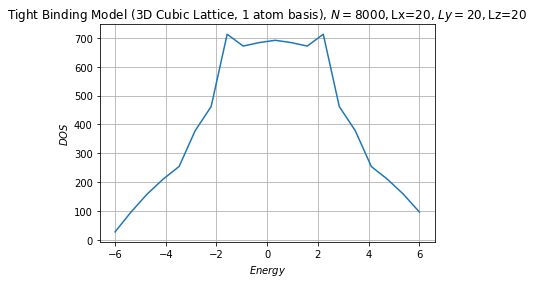

In [6]:
# Plotting Density of States vs Energy

_E = np.real(np.sort(E))
ene = np.linspace(-6.0*t,6.0*t,Lx)
DOS = np.zeros(Lx)
de = 12.0*t/Lx
for i in range(Lx):
  eh = -6.0*t + i*de + de/2.0
  el = -6.0*t + i*de - de/2.0
  s = 0
  for j in range(Nx*Ny*Nz):
    if _E[j] >= el and _E[j] <=eh:
      s += 1
  DOS[i] = s

fig, ax = plt.subplots()
ax.set_title('Tight Binding Model (3D Cubic Lattice, 1 atom basis), $N='+str(Nx*Ny*Nz)+', $Lx='+str(Lx)+', $Ly='+str(Ly)+', $Lz='+str(Lz))
ax.set_ylabel('$DOS$')
ax.set_xlabel('$Energy$')
ax.plot(ene,DOS)
ax.grid(True)